# Distribution Analysis Script

## Overview

The Distribution Analysis script provides a comprehensive examination of the distributional properties of financial data, specifically focusing on stock returns. The script explores potential deviations from the normal distribution assumption, which is a crucial aspect in various financial analyses and models.

## Purpose

The assumption of normality plays a significant role in financial modeling, especially when employing covariance-based risk measures and various statistical analyses. Understanding the distribution of returns is fundamental for risk management, portfolio optimization, and hypothesis testing.

## Script Contents

### 1. Data Retrieval

The script begins by fetching historical stock price data from Yahoo Finance using the `fetch_historical_data` function. Users can specify the assets, start date, and end date for data retrieval.

### 2. Calculating Returns

The `calculate_returns` function calculates either percentage or logarithmic returns from the provided historical stock price data. This flexibility accommodates different analytical approaches and modeling hypotheses.

### 3. Normality Tests

The `perform_normality_tests` function conducts three prominent normality tests—Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov—on the stock returns data for each asset. These tests are essential for assessing whether the returns follow a normal distribution.

### 4. Distribution Visualization

The script includes functions to visualize the distribution of returns:

- **Histograms and Kernel Density Plots:** The `plot_histograms_and_kde` function plots histograms and kernel density plots for stock returns data, offering insights into the shape and characteristics of the distribution.

- **Quantile-Quantile (Q-Q) Plots:** The `plot_qq_plot` function generates Q-Q plots for observed data against a specified theoretical distribution, providing a visual assessment of normality.

### 5. Hypothesis and Interpretation

The script incorporates explanations and interpretations for the conducted tests and visualizations. It delves into the significance of normality assumptions in financial modeling, particularly in the context of covariance-based risk measures.

## How to Use

Users can tailor the script to their specific needs by adjusting parameters such as assets, date ranges, and testing significance levels. The flexibility of the functions allows for a versatile analysis of distributional properties.

---

**Note:** Ensure that the required Python libraries (`pandas`, `numpy`, `yfinance`, `scipy`, `matplotlib`, `seaborn`) are installed before running the script.

Feel free to explore and adapt the script for your distribution analysis needs in financial research and modeling.


----

## 2. Import Libraries

In [120]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

----

## 3. Define Functions

### 3.1 fetch_historical_data

- Fetches historical stock price data from Yahoo Finance for a given list of assets within a specified date range.
- Provides flexibility for fetching data for a single stock or multiple stocks.

In [8]:
def fetch_historical_data(assets, start_date, end_date):
    """
    Fetch historical stock price data from Yahoo Finance.

    Parameters:
    - assets (list or str): List of stock tickers or a single stock ticker as a string.
    - start_date (str): Start date for data retrieval in "YYYY-MM-DD" format.
    - end_date (str): End date for data retrieval in "YYYY-MM-DD" format.

    Returns:
    - pd.DataFrame: Historical stock price data.

    Example:
    >>> assets = ['AAPL', 'GOOGL', 'MSFT']
    >>> start_date = '2023-01-01'
    >>> end_date = '2023-12-31'
    >>> data = fetch_historical_data(assets, start_date, end_date)
    >>> print(data.head())
                  AAPL        GOOGL        MSFT
    Date
    2023-01-01  150.00      2800.00      300.00
    2023-01-02  152.50      2825.00      305.00
    2023-01-03  155.00      2850.00      310.00
    2023-01-04  157.50      2875.00      315.00
    2023-01-05  160.00      2900.00      320.00
    """
    if isinstance(assets, str):
        assets = [assets]

    data = yf.download(assets, start=start_date, end=end_date)['Adj Close']
    
    return data

----

### 3.2 Calculating Returns

The `calculate_returns` function provides a versatile tool for generating returns data, accommodating different analytical approaches and hypotheses commonly employed in financial research and modeling.

#### Key Features:

- **Calculation Options:** 
    - The function allows users to choose between calculating percentage returns (default) or logarithmic returns by setting the use_log_returns parameter. 
- **DataFrame Modification:** 
    - The calculated returns are added as a new column to the original data DataFrame, for re-usability.
- **Logarithmic Returns:** 
    - Logarithmic returns are particularly useful in financial modeling, especially in geometric diffusion models used in option pricing. The adoption of logarithmic returns is motivated by their convenient mathematical properties and the ability to reduce noise in financial time series data.


In [11]:
def calculate_returns(data, use_log_returns=False):
    """
    Calculate percentage- or log returns from historical stock price data.

    Parameters:
    - data (pd.DataFrame): Historical stock price data.
    - use_log_returns (bool): If True, calculate log returns; otherwise, calculate percentage returns.

    Returns:
    - pd.DataFrame: Returns data.

    Example:
    >>> data = fetch_historical_data(['AAPL', 'GOOGL', 'MSFT'], '2023-01-01', '2023-12-31')
    >>> percentage_returns = calculate_returns(data)
    >>> print(percentage_returns.head())
                  AAPL      GOOGL      MSFT
    Date
    2023-01-02  0.0167    0.0089     0.0167
    2023-01-03  0.0164    0.0088     0.0164
    2023-01-04  0.0161    0.0087     0.0161
    2023-01-05  0.0159    0.0085     0.0159
    2023-01-06  0.0156    0.0084     0.0156

    >>> log_returns = calculate_returns(data, use_log_returns=True)
    >>> print(log_returns.head())
                  AAPL      GOOGL      MSFT
    Date
    2023-01-02  0.0165    0.0089     0.0165
    2023-01-03  0.0162    0.0088     0.0162
    2023-01-04  0.0159    0.0087     0.0159
    2023-01-05  0.0157    0.0085     0.0157
    2023-01-06  0.0154    0.0084     0.0154
    """
    if use_log_returns:
        # Create an empty DataFrame to store the log returns:
        log_returns = pd.DataFrame()
        # Iterate over each column (asset) in the `data` DataFrame:
        for column in data.columns:
            # Shift the values in that column down by one position:
            log_ret = np.log(data[column] / data[column].shift(1))
            # Assign log returns to the corresponding column in `log_returns`.
            log_returns[column] = log_ret
        return log_returns
    else:
        # Calculate regular percentage returns
        returns = data.pct_change().dropna()
        
        return returns

#### Example 1: Calculating returns

- The first row would be NaN as there isn't a previous day to compare to.

In [14]:
    >>> data = fetch_historical_data(['AAPL', 'GOOGL', 'MSFT'], '2023-01-01', '2023-12-31')
    >>> percentage_returns = calculate_returns(data)
    >>> print(percentage_returns.head())

[*********************100%%**********************]  3 of 3 completed

                AAPL     GOOGL      MSFT
Date                                    
2023-01-04  0.010314 -0.011670 -0.043743
2023-01-05 -0.010605 -0.021344 -0.029638
2023-01-06  0.036794  0.013225  0.011785
2023-01-09  0.004089  0.007786  0.009736
2023-01-10  0.004457  0.004544  0.007617


#### Example 2: Calculating logarithmic returns

- The first row is NaN as there isn't a previous day to compare to.
- Set use_log_returns=True.

In [17]:
    >>> data = fetch_historical_data(['AAPL', 'GOOGL', 'MSFT'], '2023-01-01', '2023-12-31')
    >>> percentage_returns = calculate_returns(data, use_log_returns=True)
    >>> print(percentage_returns.head())

[*********************100%%**********************]  3 of 3 completed

                AAPL     GOOGL      MSFT
Date                                    
2023-01-03       NaN       NaN       NaN
2023-01-04  0.010261 -0.011738 -0.044729
2023-01-05 -0.010661 -0.021575 -0.030086
2023-01-06  0.036133  0.013138  0.011716
2023-01-09  0.004080  0.007756  0.009689


----

### 3.3 Performing Normality Tests

The `perform_normality_tests` function conducts normality tests on stock returns data, providing insights into the distribution characteristics of each asset's returns. This is a crucial step in financial analysis, helping analysts assess the applicability of statistical models and assumptions.

#### Guidance On Hypothesis Testing:

- Null Hypothesis (H0): The data follows a normal distribution.

- Alternative Hypothesis (H1): The data does not follow a normal distribution.

- Interpretation: The p-value represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming that the null hypothesis is true. A low p-value suggests that there is evidence to reject the null hypothesis, indicating that the data does not follow a normal distribution.

- It's important to note that a p-value by itself does not prove or disprove a hypothesis. Instead, it provides a quantitative measure of the strength of evidence against the null hypothesis. The significance level (commonly set at 0.05) is used as a threshold to decide whether the evidence is strong enough to reject the null hypothesis.

#### Key Features:

- Normality Tests: The function performs three prominent normality tests on each asset's returns data:

- **Shapiro-Wilk Test:** 
    - Assessing normality based on the W statistic and p-value.
    - The W statistic measures the agreement between the sample distribution and the normal distribution.
    - For a deeper mathematical breakdown of the Shapiro-Wilk test, please refer to [this Wikipedia link](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test). 

- **Anderson-Darling Test:** 
    - Evaluating normality with critical values and a significance level.
    - For a deeper mathematical breakdown of the Anderson-Darling test, please refer to [this Wikipedia link](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test).

- **Kolmogorov-Smirnov Test:** 
    - Testing normality using the cumulative distribution function.
    - For a deeper mathematical breakdown of the Kolmogorov-Smirnov test, please refer to [this Wikipedia link](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test).

- Significance Level: The user can specify the significance level for the normality tests, allowing for customization based on the desired level of confidence.

- Applicability in Finance: Assessing the normality of returns is essential in financial modeling, where many assumptions rely on the normal distribution of returns. Understanding the distribution characteristics aids in making informed decisions and selecting appropriate risk modeling techniques.

In [94]:
def perform_normality_tests(data, significance_level):
    """
    Perform normality tests on stock returns data.

    Parameters:
    - data (pd.DataFrame): Returns data.

    Returns:
    - list: Results of normality tests for each asset.
    """
    results = {}

    for asset in data.columns:

        # Shapiro-Wilk Test
        stat_sw, p_value_sw = shapiro(data[asset].dropna())
        
        # Anderson-Darling Test
        result_ad = stats.anderson(data[asset].dropna(), dist='norm')
        stat_ad = result_ad.statistic
        critical_values_ad = result_ad.critical_values
        p_value_ad = result_ad.significance_level

        # Kolmogorov-Smirnov Test
        stat_ks, p_value_ks = stats.kstest(data[asset].dropna(), 'norm')

        # Print statements based on significance level
        print(f"\n{asset}:")
        if p_value_sw > significance_level:
            print(f"The data for {asset} follows a normal distribution based on Shapiro-Wilk test (p-value={p_value_sw:.3f})")
        else:
            print(f"The data for {asset} does not follow a normal distribution based on Shapiro-Wilk test (p-value={p_value_sw:.3f})")

        if all(p > significance_level for p in p_value_ad):
            print(f"The data for {asset} follows a normal distribution based on Anderson-Darling test (p-values: {p_value_ad})")
        else:
            print(f"The data for {asset} does not follow a normal distribution based on Anderson-Darling test (p-values: {p_value_ad})")
        
        if p_value_ks > significance_level:
            print(f"The data for {asset} follows a normal distribution based on Kolmogorov-Smirnov test (p-value={p_value_ks:.3f})")
        else:
            print(f"The data for {asset} does not follow a normal distribution based on Kolmogorov-Smirnov test (p-value={p_value_ks:.3f})")
       
        
        results[asset] = {
            'Shapiro-Wilk Test': {'Statistic': stat_sw, 'p-value': p_value_sw},
            'Anderson-Darling Test': {'Statistic': stat_ad, 'Critical Values': critical_values_ad, 'p-value': p_value_ad},
            'Kolmogorov-Smirnov Test': {'Statistic': stat_ks, 'p-value': p_value_ks}
        }
        
    return[results]


#### Example 3: Performing Normality Tests

In [104]:
    >>> data = fetch_historical_data(['AAPL', 'GOOGL', 'MSFT'], '2023-01-01', '2023-12-31')
    >>> perform_normality_tests(data, significance_level = 0.03)

[*********************100%%**********************]  3 of 3 completed


AAPL:
The data for AAPL does not follow a normal distribution based on Shapiro-Wilk test (p-value=0.000)
The data for AAPL follows a normal distribution based on Anderson-Darling test (p-values: [15.  10.   5.   2.5  1. ])
The data for AAPL does not follow a normal distribution based on Kolmogorov-Smirnov test (p-value=0.000)

GOOGL:
The data for GOOGL does not follow a normal distribution based on Shapiro-Wilk test (p-value=0.000)
The data for GOOGL follows a normal distribution based on Anderson-Darling test (p-values: [15.  10.   5.   2.5  1. ])
The data for GOOGL does not follow a normal distribution based on Kolmogorov-Smirnov test (p-value=0.000)

MSFT:
The data for MSFT does not follow a normal distribution based on Shapiro-Wilk test (p-value=0.000)
The data for MSFT follows a normal distribution based on Anderson-Darling test (p-values: [15.  10.   5.   2.5  1. ])
The data for MSFT does not follow a normal distribution based on Kolmogorov-Smirnov test (p-value=0.000)


[{'AAPL': {'Shapiro-Wilk Test': {'Statistic': 0.9417341351509094,
    'p-value': 2.0604474570973252e-08},
   'Anderson-Darling Test': {'Statistic': 4.115375231559682,
    'Critical Values': array([0.567, 0.646, 0.775, 0.904, 1.075]),
    'p-value': array([15. , 10. ,  5. ,  2.5,  1. ])},
   'Kolmogorov-Smirnov Test': {'Statistic': 1.0, 'p-value': 0.0}},
  'GOOGL': {'Shapiro-Wilk Test': {'Statistic': 0.9070566892623901,
    'p-value': 2.4812546114971745e-11},
   'Anderson-Darling Test': {'Statistic': 8.368285100389016,
    'Critical Values': array([0.567, 0.646, 0.775, 0.904, 1.075]),
    'p-value': array([15. , 10. ,  5. ,  2.5,  1. ])},
   'Kolmogorov-Smirnov Test': {'Statistic': 1.0, 'p-value': 0.0}},
  'MSFT': {'Shapiro-Wilk Test': {'Statistic': 0.9447664022445679,
    'p-value': 4.132524011879468e-08},
   'Anderson-Darling Test': {'Statistic': 4.99355858062961,
    'Critical Values': array([0.567, 0.646, 0.775, 0.904, 1.075]),
    'p-value': array([15. , 10. ,  5. ,  2.5,  1. ])},


----

### 3.4 Plotting histograms and the kernel density of returns

#### Overview

This function plots histograms and kernel density plots for stock returns data, supporting both single series and multiple assets in a Pandas DataFrame. It visualizes the distribution of returns, including mean, median, and mode.

- The histograms group the returns in ascending order and groups them with equal-size bins defined by the `bins` variable.
- The kernel density is a continuous distribution approximation of the returns.

#### Mean-Reversion Analysis

The function allows one to visually test the common hypothesis of mean reversion in financial markets, indicating that returns tend to oscillate around zero. This characteristic is pivotal for understanding the cyclical behavior of financial assets over time.

#### Interpretation

- **Normal Distribution:**
    - For normally distributed variables, the mean, mode, and median are all equal. 
    - The mean is the frequency-weighted average of returns and can be interpreted as the expected return value.
    - The mode is the most frequent return value. Since returns are a continuous variable, it is practical to approximate the mode as the most frequent histogram bin.

In [24]:
def plot_histograms_and_kde(data, use_log_returns=False):
    """
    Plot histograms and kernel density plots for stock returns data.

    Parameters:
    - data (pd.DataFrame): Returns data.
    - use_log_returns (bool): If True, use log returns for plotting.

    Returns:
    - None
    """
    # Display histograms and Kernel Density plots in a grid of subplots:
    n_assets = len(data.columns) if isinstance(data, pd.DataFrame) else 1
    n_rows = n_assets // 2 + n_assets % 2

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 2.5 * n_rows))
    returns_type = "Log Returns" if use_log_returns else "Returns"
    fig.suptitle(f"Distribution and Kernel Density of {returns_type} for Assets", fontsize=16)

    # List to store the axes for each asset
    asset_axes = []

    if isinstance(data, pd.DataFrame):
        for i, asset in enumerate(data.columns):
            row, col = i // 2, i % 2
            ax = axes[row, col]
            asset_axes.append(ax)

            # Plot Histogram:
            ax.hist(data[asset].dropna(), bins=50, alpha=0.6, label=f'{asset} {returns_type}')

            # Plot Kernel Density:
            sns.kdeplot(data[asset].dropna(), ax=ax, label=f'{asset} KDE', color='red')

            # Calculate Mean and Mode using histogram bins:
            mean = np.mean(data[asset].dropna())
            hist, bin_edges = np.histogram(data[asset].dropna(), bins=50)  # Adjust bins as needed
            bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
            mode_bin = bin_centers[np.argmax(hist)]  # Bin with the highest count is considered the mode
            median = np.median(data.dropna())
            
            # Plot vertical lines for mean, median, and mode for each asset
            ax.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.4f}')
            ax.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.4f}')
            ax.axvline(mode_bin, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_bin:.4f}')
            ax.legend()


    else:  # For a single series
        ax = axes[0, 0]
        asset_axes.append(ax)

        # Plot Histogram:
        ax.hist(data.dropna(), bins=50, alpha=0.6, label=f'{returns_type}')

        # Plot Kernel Density:
        sns.kdeplot(data.dropna(), ax=ax, label=f'Density', color='red')

        # Calculate Mean and Median and Mode using histogram bins:
        mean = np.mean(data.dropna())
        hist, bin_edges = np.histogram(data.dropna(), bins=50)  # Adjust bins as needed
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        mode_bin = bin_centers[np.argmax(hist)]  # Bin with the highest count is considered the mode
        median = np.median(data.dropna())
        
        # Plot vertical lines for mean, median, and mode for the single series
        ax.set_title(f"{returns_type} Distribution")
        ax.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.4f}')
        ax.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.4f}')
        ax.axvline(mode_bin, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_bin:.4f}')
        ax.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

#### Example 4: Plotting Returns Distribution and Kernel Density

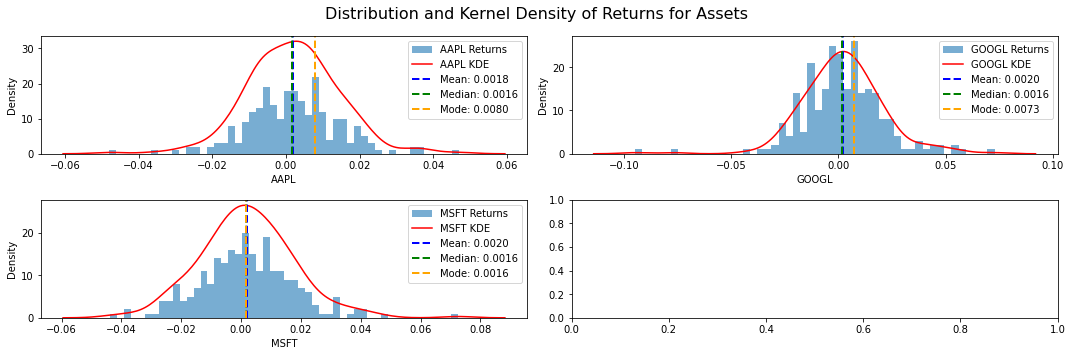

In [42]:
    >>> percentage_returns = calculate_returns(data, use_log_returns=False)    
    >>> plot_histograms_and_kde(percentage_returns)

#### Example 5: Plotting Logarithmic Returns Distribution and Kernel Density

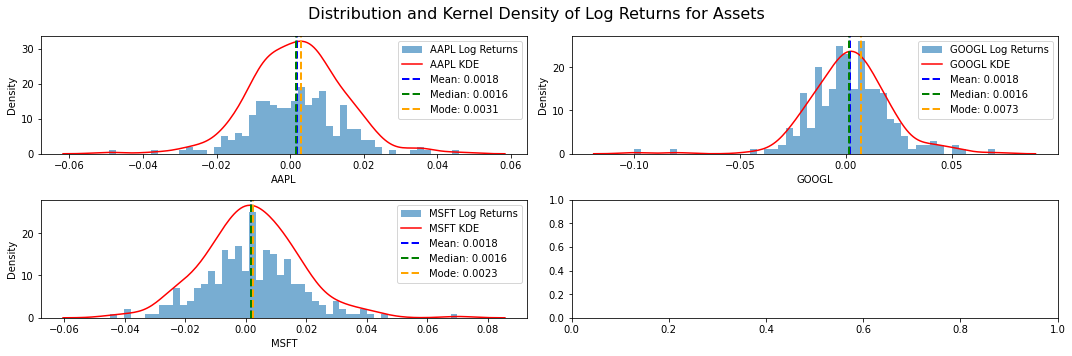

In [44]:
    >>> percentage_returns = calculate_returns(data, use_log_returns=True)
    >>> plot_histograms_and_kde(percentage_returns, use_log_returns=True)

----

### 3.5 Quantile-Quantile (Q-Q) Plots

The `plot_qq_plot` function is designed to visualize the agreement between observed data and a specified theoretical distribution through Quantile-Quantile (Q-Q) plots. This provides insights into the normality of the data distribution.

#### Key Features:

- **Q-Q Plotting:**
    - The function utilizes Quantile-Quantile (Q-Q) plots, a graphical tool to assess if a dataset follows a particular theoretical distribution.
    - Q-Q plots compare the quantiles of the observed data against the quantiles expected from the theoretical distribution.

- **Theoretical Distribution:**
    - Users can specify the theoretical distribution for comparison, with the default being the normal distribution (`"norm"`).

- **Skewness and Kurtosis Analysis:**
    - For each asset, the function provides skewness and kurtosis analysis, offering additional insights into the shape and tail behavior of the distribution.

- **Interpretation:**
    - A close alignment of points to the diagonal line in the Q-Q plot suggests a good fit with the theoretical distribution.
    - Skewness and kurtosis values offer information about the symmetry and tail characteristics of the distribution.

- **Customization:**
    - Users can customize the function by specifying the theoretical distribution (`distribution_name`) and choosing whether regular or log returns are used (`use_log_returns`).

- **References:**
    - For a detailed understanding of Q-Q plots, refer to [this Wikipedia link](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot).
    - Skewness and kurtosis information is also provided for a comprehensive analysis.

The `plot_qq_plot` function contributes to a thorough examination of the distributional properties of financial returns data, aiding in model validation and hypothesis testing.

In [48]:
def plot_qq_plot(data, asset, distribution_name="norm", use_log_returns=False):
    """
    Plot a Q-Q plot for the given data against a theoretical distribution.

    :param data: Observed data
    :type data: pandas.Series or numpy.ndarray
    :param asset: Asset name
    :type asset: str
    :param distribution_name: Theoretical distribution name, default is "Normal"
    :type distribution_name: str
    :param use_log_returns: Whether to use log returns, default is False
    :type use_log_returns: bool
    """
    dist = getattr(stats, distribution_name)
    distargs = ()

    # Create subplots for Q-Q plots:
    n_assets = len(data.columns) if isinstance(data, pd.DataFrame) else 1
    n_rows = n_assets // 2 + n_assets % 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 2.5 * n_rows))
    returns_type = "Log Returns" if use_log_returns else "Returns"
    fig.suptitle(f"Quartile-Quartile Plots against {distribution_name} distribution", fontsize=16)
    
    if isinstance(data, pd.DataFrame):
        for i, asset in enumerate(data.columns):
            row, col = i // 2, i % 2
            ax = axes[row, col]
            
            sm.qqplot(data[asset].dropna(), line='s', dist=dist, ax=ax,label=f'{asset}')
        
            # Skewness and Kurtosis
            skewness = stats.skew(data[asset].dropna())
            kurtosis = stats.kurtosis(data[asset].dropna())
            
            ax.set_title(f"{asset} {returns_type} Skewness: {skewness:.4f} Kurtosis: {kurtosis:.4f}")
            ax.legend()
        
    else:  # For a single series
        ax = axes[0, 0]
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

#### Example 6: Plotting Q-Q plots for Returns

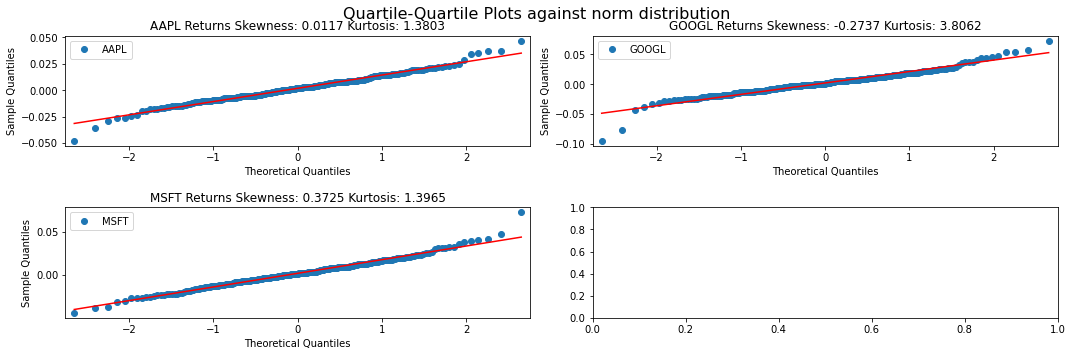

In [56]:
    >>> assets = ['AAPL', 'GOOGL', 'MSFT']
    >>> percentage_returns = calculate_returns(data, use_log_returns=False)    
    >>> plot_qq_plot(percentage_returns, assets)

#### Example 7: Plotting Q-Q plots for Logarithmic Returns

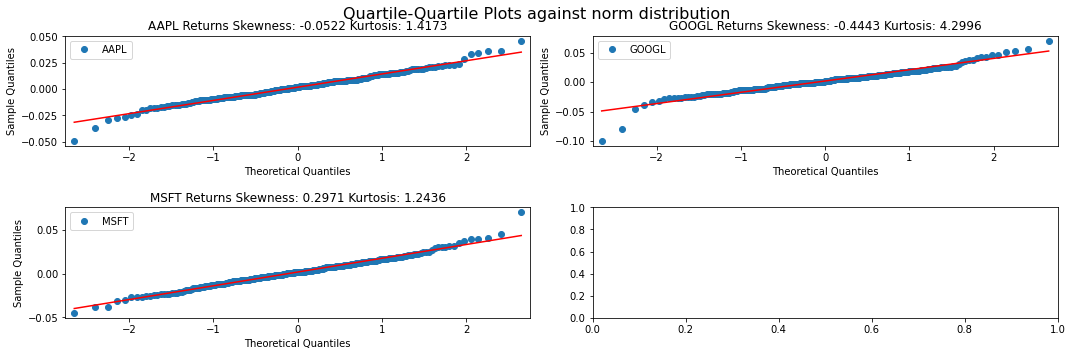

In [58]:
    >>> assets = ['AAPL', 'GOOGL', 'MSFT']
    >>> percentage_returns = calculate_returns(data, use_log_returns=True)    
    >>> plot_qq_plot(percentage_returns, assets)

----

### 3.7 configure
Centralizes user-configurable settings, such as assets, start date, end date, use of log returns, distribution name, and significance level.

In [61]:
def configure():
    # Centralise user-configurable settings here: 
    assets = ["AAPL","MSFT", "AMZN", "NVDA", "GOOGL", "TSLA", "UNH", "LLY", "XOM", "JPM", "V", "JNJ"]
    start_date = "2022-01-01"
    end_date = "2023-01-01"
    use_log_returns = False
    distribution_name = "norm"
    significance_level = 0.05
    return assets, start_date, end_date, use_log_returns, distribution_name, significance_level


----

### 3.8 main

Orchestrates the main workflow of the script.
Retrieves configuration settings.
Fetches historical data, calculates returns, performs normality tests, and plots various visualizations for each asset.

[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  12 of 12 completed

AAPL:
The data for AAPL does not follow a normal distribution based on Shapiro-Wilk test (p-value=0.019)
The data for AAPL follows a normal distrib

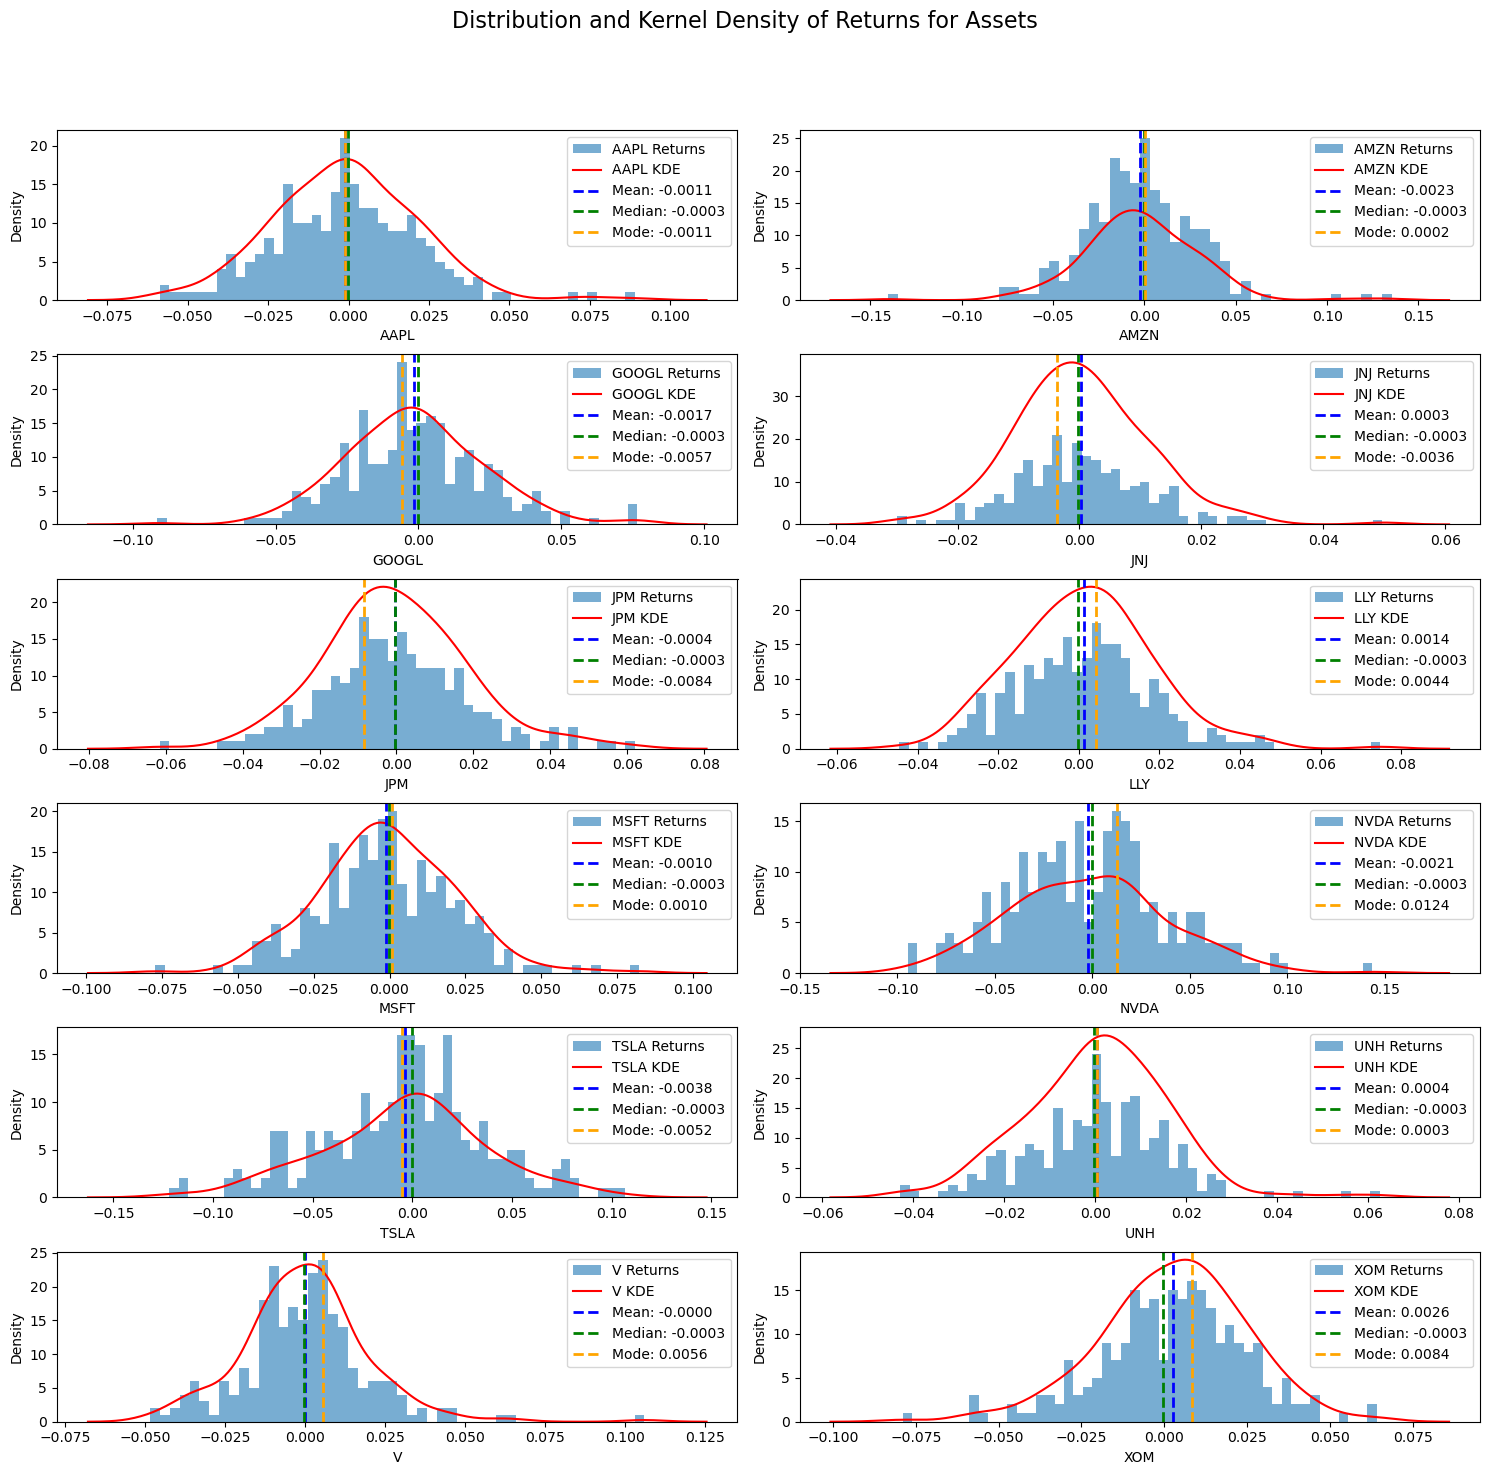

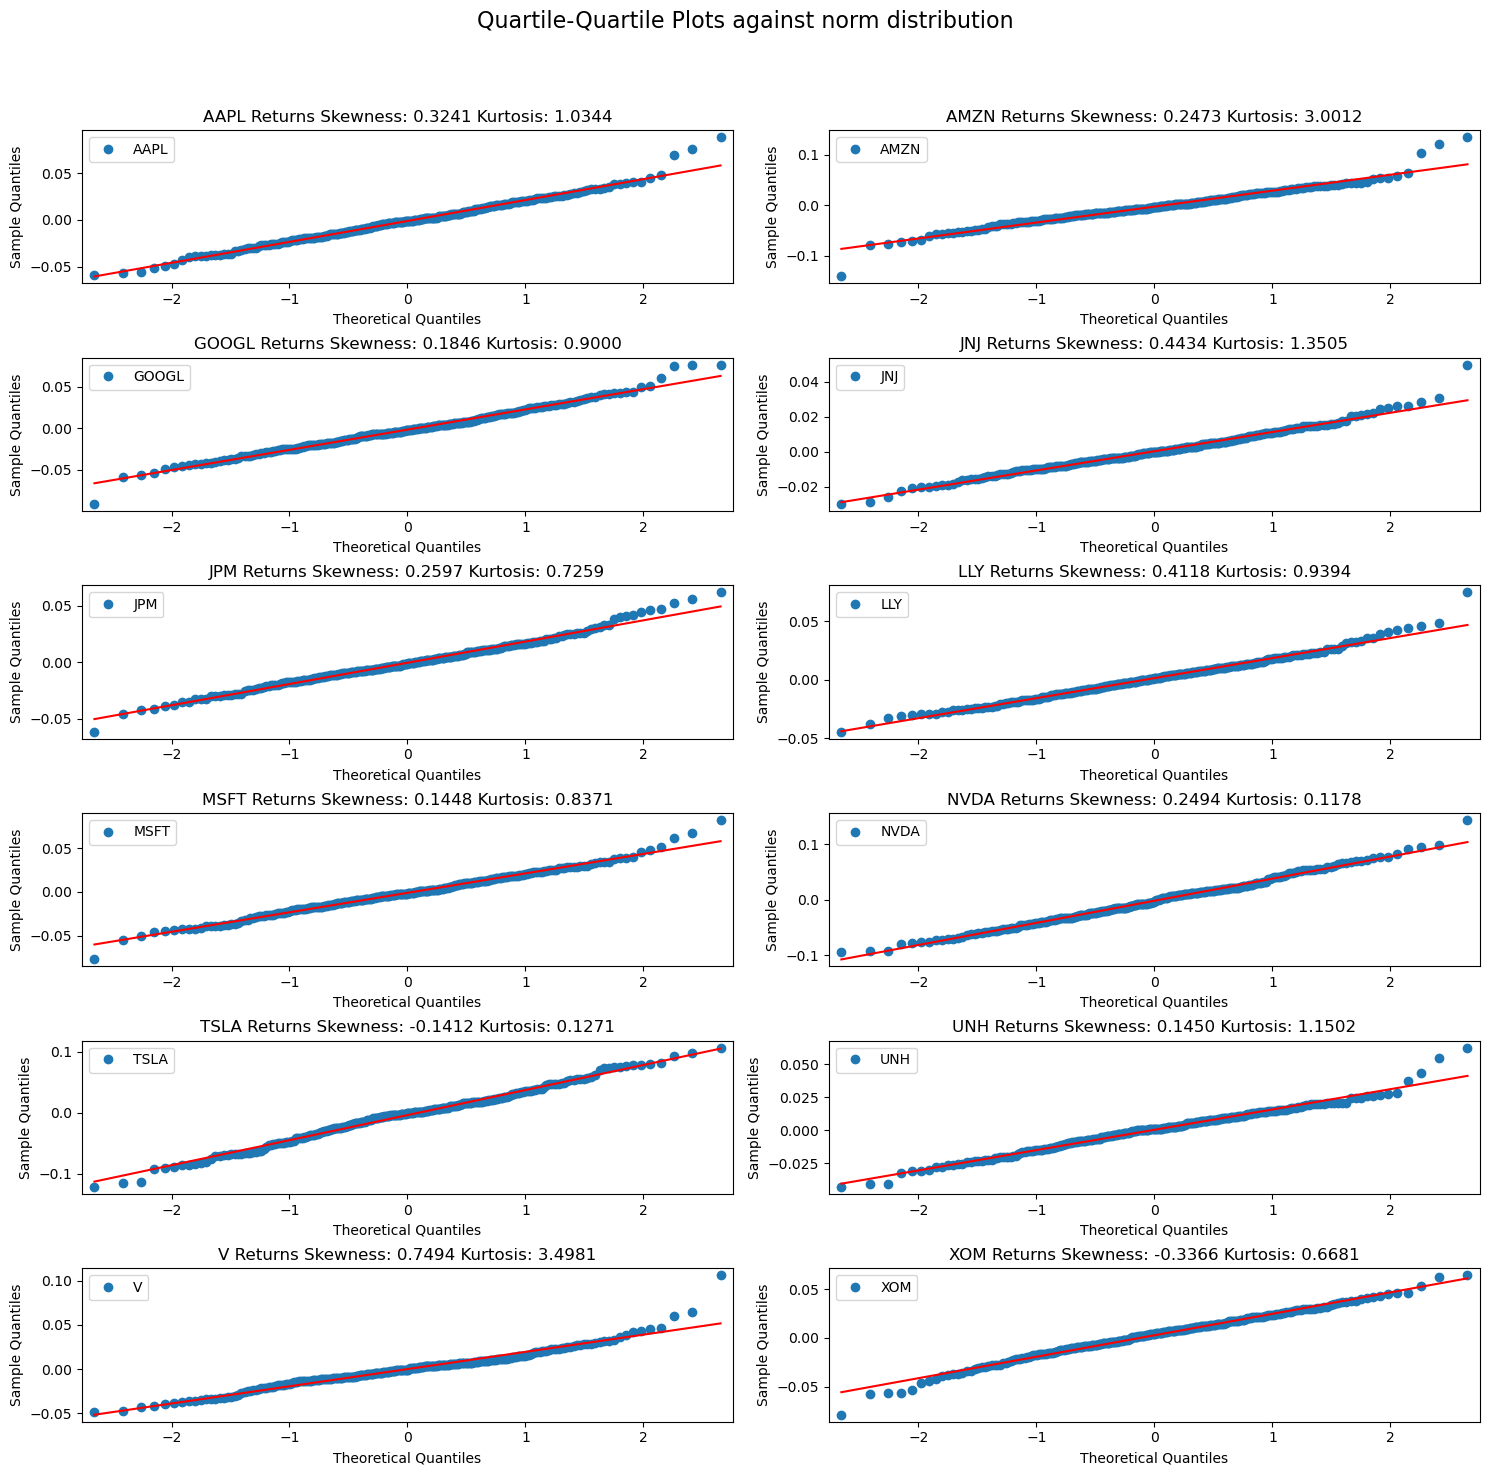

In [90]:
def main():
        
    # Get configuration settings
    assets, start_date, end_date, use_log_returns, distribution_name, significance_level = configure()    
        
    for asset in assets:
    
        # Fetch historical data for the current year:
        data = fetch_historical_data(assets, start_date, end_date)
        
        # Calculate Returns:
        returns = calculate_returns(data, use_log_returns)
          
         
    # Perform Normality Tests:
    normality_test_results = perform_normality_tests(returns, significance_level)
    
    # Plot Histograms and Kernel Density:
    plot_histograms_and_kde(returns, use_log_returns)
    
    # Plot Quantile-Quantile Plot:
    plot_qq_plot(returns, asset, distribution_name, use_log_returns)
    
if __name__ == "__main__":
    main()   